In [35]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


METAGENOMES

In [43]:
#reading in the ranked list for metagenomes
rnk = pd.read_csv("../../results/latent_variable_modeling/16s-4_mtg-5_mtt-4_mbx-7/mtg_kos_rankedlist.csv", header=0, sep="\t")

In [44]:
rnk


,ko,stat
0,K07282,1.313120
1,K10549,1.012418
2,K10551,0.434770
3,K00856,0.350823
4,K02779,0.347758
5,K02778,0.331366
6,K17675,0.169066
7,K16055,0.121261
8,K15725,0.111252
9,K01719,0.101708


In [4]:
#Process gmt into a dictionary

with open('kegg_gene_set.gmt', 'r') as reader:
    lines = reader.readlines()
    
d = {}
for line in lines:
    line = line.strip().split(",")
    d[line[0]] = line[1:]

In [5]:
d

{'ko00010': ['K00844',
  'K12407',
  'K00845',
  'K25026',
  'K01810',
  'K06859',
  'K13810',
  'K15916',
  'K24182',
  'K00850',
  'K16370',
  'K21071',
  'K00918',
  'K00895',
  'K03841',
  'K02446',
  'K11532',
  'K01086',
  'K04041',
  'K01623',
  'K11645',
  'K01624',
  'K01622',
  'K16305',
  'K16306',
  'K01803',
  'K00134',
  'K10705',
  'K00150',
  'K00927',
  'K01834',
  'K15634',
  'K15633',
  'K15635',
  'K01689',
  'K00873',
  'K12406',
  'K01006',
  'K01007',
  'K00163',
  'K00161',
  'K00162',
  'K00627',
  'K00382',
  'K00169',
  'K00170',
  'K00172',
  'K00189',
  'K00171',
  'K03737',
  'K00174',
  'K00175',
  'K00016',
  'K01568',
  'K13951',
  'K13980',
  'K00121',
  'K13952',
  'K04072',
  'K13953',
  'K13954',
  'K18857',
  'K00001',
  'K00002',
  'K12957',
  'K13979',
  'K14028',
  'K14029',
  'K00114',
  'K04022',
  'K22473',
  'K22474',
  'K00128',
  'K14085',
  'K00149',
  'K00129',
  'K00138',
  'K01895',
  'K01913',
  'K01905',
  'K22224',
  'K24012',
  'K0

In [45]:
#running prerank on the metagenomes file
results = gp.prerank(rnk = rnk, gene_sets = d , permutation_num = 200, min_size = 0, max_size = 1000, verbose= True)

2022-07-12 14:01:13,809 Parsing data files for GSEA.............................
2022-07-12 14:01:13,909 0000 gene_sets have been filtered out when max_size=1000 and min_size=0
2022-07-12 14:01:13,909 0448 gene_sets used for further statistical testing.....
2022-07-12 14:01:13,910 Start to run GSEA...Might take a while..................
2022-07-12 14:01:14,312 Start to generate gseapy reports, and produce figures...
2022-07-12 14:01:18,355 Congratulations. GSEApy runs successfully................



In [46]:
res = pd.DataFrame(results.res2d)
#res = res.loc[res.pval < .05, :]
res.loc[:, 'genes_list'] = [i.split(";") for i in res.genes]
res.loc[:, 'num_genes'] = [len(i) for i in res.genes_list]
res.sort_values('num_genes', ascending = False)

res.to_csv("../../results/latent_variable_modeling/16s-4_mtg-5_mtt-4_mbx-7/gsea/gsea_mtg_cluster1.csv")

In [47]:
keep = [not math.isnan(i) for i in res.es]
res.loc[keep, :]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,genes_list,num_genes
Term,,,,,,,,,,
ko05226,-1.000000,-1.306492,0.000000,0.252139,108,1,K08734,K08734,[K08734],1
ko05210,-1.000000,-1.290197,0.000000,0.292242,72,1,K08734,K08734,[K08734],1
ko03460,-1.000000,-1.308057,0.000000,0.305574,54,1,K08734,K08734,[K08734],1
ko03430,-1.000000,-1.251420,0.000000,0.329572,44,1,K08734,K08734,[K08734],1
ko00770,-0.800000,-1.259799,0.219780,0.352885,44,2,K01918;K01579,K01918;K01579,"[K01918, K01579]",2
ko05213,-1.000000,-1.321219,0.000000,0.364769,45,1,K08734,K08734,[K08734],1
ko05200,-1.000000,-1.350351,0.000000,0.383968,417,1,K08734,K08734,[K08734],1
ko00430,-0.934783,-1.220820,0.131313,0.388234,23,1,K15372,K15372,[K15372],1
ko00410,-0.818182,-1.455530,0.158537,0.575951,44,3,K01918;K01579;K15372,K01918;K01579;K15372,"[K01918, K01579, K15372]",3


In [42]:
res.loc["ko00230", :]

es                                                       0.997788
nes                                                           NaN
pval                                                     0.474747
fdr                                                  1000000000.0
geneset_size                                                  213
matched_size                                                  144
genes           K00856;K00926;K00957;K11175;K00956;K13713;K140...
ledge_genes                    K00856;K00926;K00957;K11175;K00956
genes_list      [K00856, K00926, K00957, K11175, K00956, K1371...
num_genes                                                     144
Name: ko00230, dtype: object

In [4]:
#reading in the ranked list for metagenomes
rnk = pd.read_csv("../../../../results/latent_variable_modeling/rank_list_mtt_cluster1.rnk", header=0, sep=",")

#running prerank on the metagenomes file
results = gp.prerank(rnk = rnk, gene_sets = d , permutation_num = 1000, min_size = 0, max_size = 10000, verbose= True)

res = pd.DataFrame(results.res2d)
res = res.loc[res.pval < .05, :]
res.loc[:, 'genes_list'] = [i.split(";") for i in res.genes]
res.loc[:, 'num_genes'] = [len(i) for i in res.genes_list]
res.sort_values('num_genes', ascending = False)

res.to_csv("gsea_mtt_cluster1.csv")

In [5]:
#reading in the ranked list for metagenomes
rnk = pd.read_csv("../../../../results/latent_variable_modeling/rank_list_mtg_cluster2.rnk", header=0, sep=",")

#running prerank on the metagenomes file
results = gp.prerank(rnk = rnk, gene_sets = d , permutation_num = 1000, min_size = 0, max_size = 10000, verbose= True)

res = pd.DataFrame(results.res2d)
res = res.loc[res.pval < .05, :]
res.loc[:, 'genes_list'] = [i.split(";") for i in res.genes]
res.loc[:, 'num_genes'] = [len(i) for i in res.genes_list]
res.sort_values('num_genes', ascending = False)

res.to_csv("gsea_mtg_cluster2.csv")

2022-05-10 10:32:41,004 Input gene rankings contains NA values(gene name and ranking value), drop them all!
2022-05-10 10:32:41,031 Parsing data files for GSEA.............................
2022-05-10 10:32:43,547 0000 gene_sets have been filtered out when max_size=10000 and min_size=0
2022-05-10 10:32:43,548 0448 gene_sets used for further statistical testing.....
2022-05-10 10:32:43,548 Start to run GSEA...Might take a while..................
2022-05-10 10:34:16,432 Start to generate gseapy reports, and produce figures...
2022-05-10 10:34:21,626 Congratulations. GSEApy runs successfully................



In [6]:
#reading in the ranked list for metagenomes
rnk = pd.read_csv("../../../../results/latent_variable_modeling/rank_list_mtt_cluster2.rnk", header=0, sep=",")

#running prerank on the metagenomes file
results = gp.prerank(rnk = rnk, gene_sets = d , permutation_num = 1000, min_size = 0, max_size = 10000, verbose= True)

res = pd.DataFrame(results.res2d)
res = res.loc[res.pval < .05, :]
res.loc[:, 'genes_list'] = [i.split(";") for i in res.genes]
res.loc[:, 'num_genes'] = [len(i) for i in res.genes_list]
res.sort_values('num_genes', ascending = False)

res.to_csv("gsea_mtt_cluster2.csv")

2022-05-10 10:34:25,925 Input gene rankings contains NA values(gene name and ranking value), drop them all!
2022-05-10 10:34:25,930 Parsing data files for GSEA.............................
2022-05-10 10:34:29,060 0000 gene_sets have been filtered out when max_size=10000 and min_size=0
2022-05-10 10:34:29,061 0448 gene_sets used for further statistical testing.....
2022-05-10 10:34:29,062 Start to run GSEA...Might take a while..................
2022-05-10 10:37:14,445 Start to generate gseapy reports, and produce figures...
2022-05-10 10:37:37,219 Congratulations. GSEApy runs successfully................



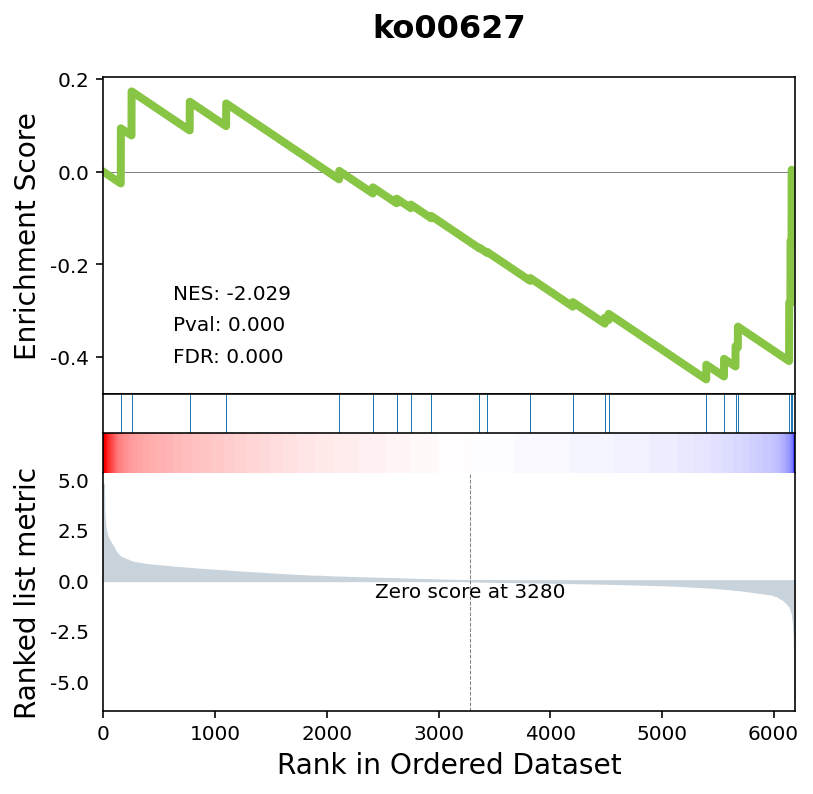

In [25]:
from gseapy.plot import gseaplot,heatmap

# to save your figure, make sure that ofname is not None
gseaplot(rank_metric=results.ranking, term=terms[0], **results.results[terms[0]])

METATRANSCIPTOMES

In [14]:
#reading the ranked file for the metatranscriptomes
rank = pd.read_csv("./mtt_log2mean_ranklist.rnk", header=None, sep=",")
rank.head()

,0,1
0,K00001,-0.130535
1,K00002,0.748205
2,K00003,0.311635
3,K00004,0.617569
4,K00005,0.140903


In [18]:
#running prerank on the metranscriptomes file
results2 = gp.prerank(rnk = rank, gene_sets = d, permutation_num = 10, min_size = 0, max_size = 10000, verbose= True, outdir = "metatranscriptomes/kegg_test_reports")

2021-08-09 13:32:58,601 Parsing data files for GSEA.............................
2021-08-09 13:33:12,988 0000 gene_sets have been filtered out when max_size=10000 and min_size=0
2021-08-09 13:33:12,988 0448 gene_sets used for further statistical testing.....
2021-08-09 13:33:12,988 Start to run GSEA...Might take a while..................
2021-08-09 13:33:28,873 Start to generate gseapy reports, and produce figures...
2021-08-09 13:33:48,830 Congratulations. GSEApy runs successfully................



In [19]:
#results after running prerank
results2.res2d.sort_index().head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
ko00010,0.181477,0.760780,1.0,0.959952,106,77,K22224;K16306;K02753;K00002;K02791;K06859;K157...,K22224;K16306;K02753;K00002;K02791;K06859;K157...
ko00020,-0.501819,-1.563174,0.0,0.030643,62,54,K00242;K05942;K01959;K01616;K00170;K01958;K001...,K00246;K00245;K00236;K15230;K01596;K00161;K001...
ko00030,0.331569,1.005590,0.0,0.879681,85,53,K01053;K00117;K16306;K19813;K13812;K06859;K157...,K01053;K00117;K16306;K19813;K13812;K06859;K157...
ko00040,0.337764,1.235918,0.0,0.647771,85,52,K22186;K13877;K22185;K22397;K21681;K00002;K008...,K22186;K13877;K22185;K22397;K21681;K00002;K008...
ko00051,0.247095,0.913058,0.5,0.945647,111,82,K18334;K16881;K12660;K16306;K18333;K01729;K008...,K18334;K16881;K12660;K16306;K18333;K01729;K008...


In [20]:
#enriched cohorts for metranscriptomes
terms_trans = results2.res2d.index
terms_trans

Index(['ko00195', 'ko03010', 'ko03015', 'ko03040', 'ko03050', 'ko04011',
       'ko04024', 'ko04071', 'ko04111', 'ko04113',
       ...
       'ko04950', 'ko05144', 'ko05310', 'ko05320', 'ko05321', 'ko05330',
       'ko05332', 'ko00361', 'ko00460', 'ko00471'],
      dtype='object', name='Term', length=448)